# Snake $vs$ Strip MPS approaches

In [15]:
def snake(L, N, chi, sweeps: int=2):
    return (2*2*(N+2)*(chi**3) + (2**2)*((N+2)**2)*(chi**2))*((L*N)-1)*sweeps

def snake_svd(L, N, chis, sweeps: int=2):
    return 2*sum([(2*2*(N+2)*(chi**3) + (2**2)*((N+2)**2)*(chi**2))*(L-1)*sweeps for chi in chis])

def chis_svd(N):
    return [(2**(N+2))*2**i for i in range(N//2+1)]
    
def strip(L, N, chi, sweeps: int=2):
    return (2*(2**N)*(N+2)*(chi**3) + (2**(2*N))*((N+2)**2)*(chi**2))*(L-1)*sweeps

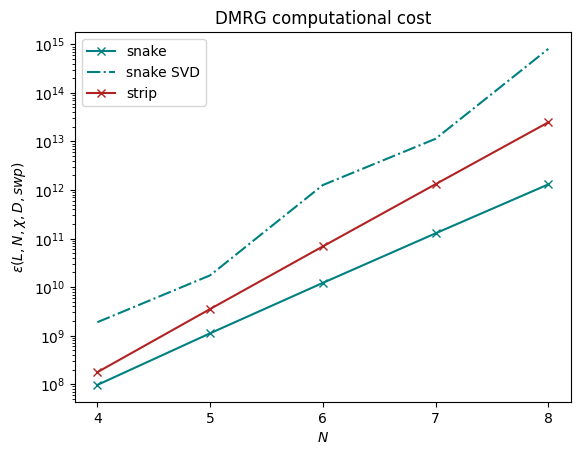

In [23]:
import matplotlib.pyplot as plt

L = 2
N_in, N_fin = 4, 9
snakes = [snake(L, N, 2**(N+2)) for N in range(N_in,N_fin)]
snakes_real = [snake_svd(L, N, chis_svd(N)) for N in range(N_in,N_fin)]
stripes = [strip(L, N, 2**(N+2)) for N in range(N_in,N_fin)]
plt.plot(range(N_in,N_fin), snakes, '-x', color='teal', label="snake")
plt.plot(range(N_in,N_fin), snakes_real, '-.', color='teal', label="snake SVD")
plt.plot(range(N_in,N_fin), stripes, '-x', color='firebrick', label="strip")
plt.legend()
plt.xlabel("$N$")
plt.ylabel("$\\epsilon (L, N, \\chi, D, swp)$")
plt.xticks(range(N_in,N_fin), range(N_in,N_fin))
plt.title("DMRG computational cost")
plt.yscale('log')